In [1]:
## Import libraries ##
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.patches import Rectangle
import seaborn as sns
%matplotlib inline

In [2]:
## Import datasets ##

mb = pd.read_csv('phase1_project_group6/data/tn.movie_budgets.csv.gz')

## Change release_date to datetime
mb['release_date'] = pd.to_datetime(mb['release_date'])

## Change production_budget, domestic_gross, and worldwide_gross to integer

mb['production_budget'] = mb['production_budget'].str.replace( ',' , '')
mb['production_budget'] = mb['production_budget'].str.replace( '$' , '')
mb['production_budget'] = pd.to_numeric(mb['production_budget'])

mb['domestic_gross'] = mb['domestic_gross'].str.replace( ',' , '')
mb['domestic_gross'] = mb['domestic_gross'].str.replace( '$' , '')
mb['domestic_gross'] = pd.to_numeric(mb['domestic_gross'])

mb['worldwide_gross'] = mb['worldwide_gross'].str.replace( ',' , '')
mb['worldwide_gross'] = mb['worldwide_gross'].str.replace( '$' , '')
mb['worldwide_gross'] = pd.to_numeric(mb['worldwide_gross'])

## Remove rows with release_date before 2010 to focus on analyzing data from the most recent decade

mb = mb[(mb['release_date']) >= '2010-01-01']

## Create two new columns for domestic profit and worldwide profit
## Remove rows with negative profits

mb['domestic_profit'] = (mb['domestic_gross'] - mb['production_budget'])
mb['worldwide_profit'] = (mb['worldwide_gross'] - mb['production_budget'])

## Sort by highest domestic profits

mb_dp = mb.sort_values(by=['domestic_profit'], ascending=False)
mb_dp.reset_index(inplace=True)

## Sort by highest worldwide profits

mb_wp = mb.sort_values(by=['worldwide_profit'], ascending=False)
mb_wp.reset_index(inplace=True)

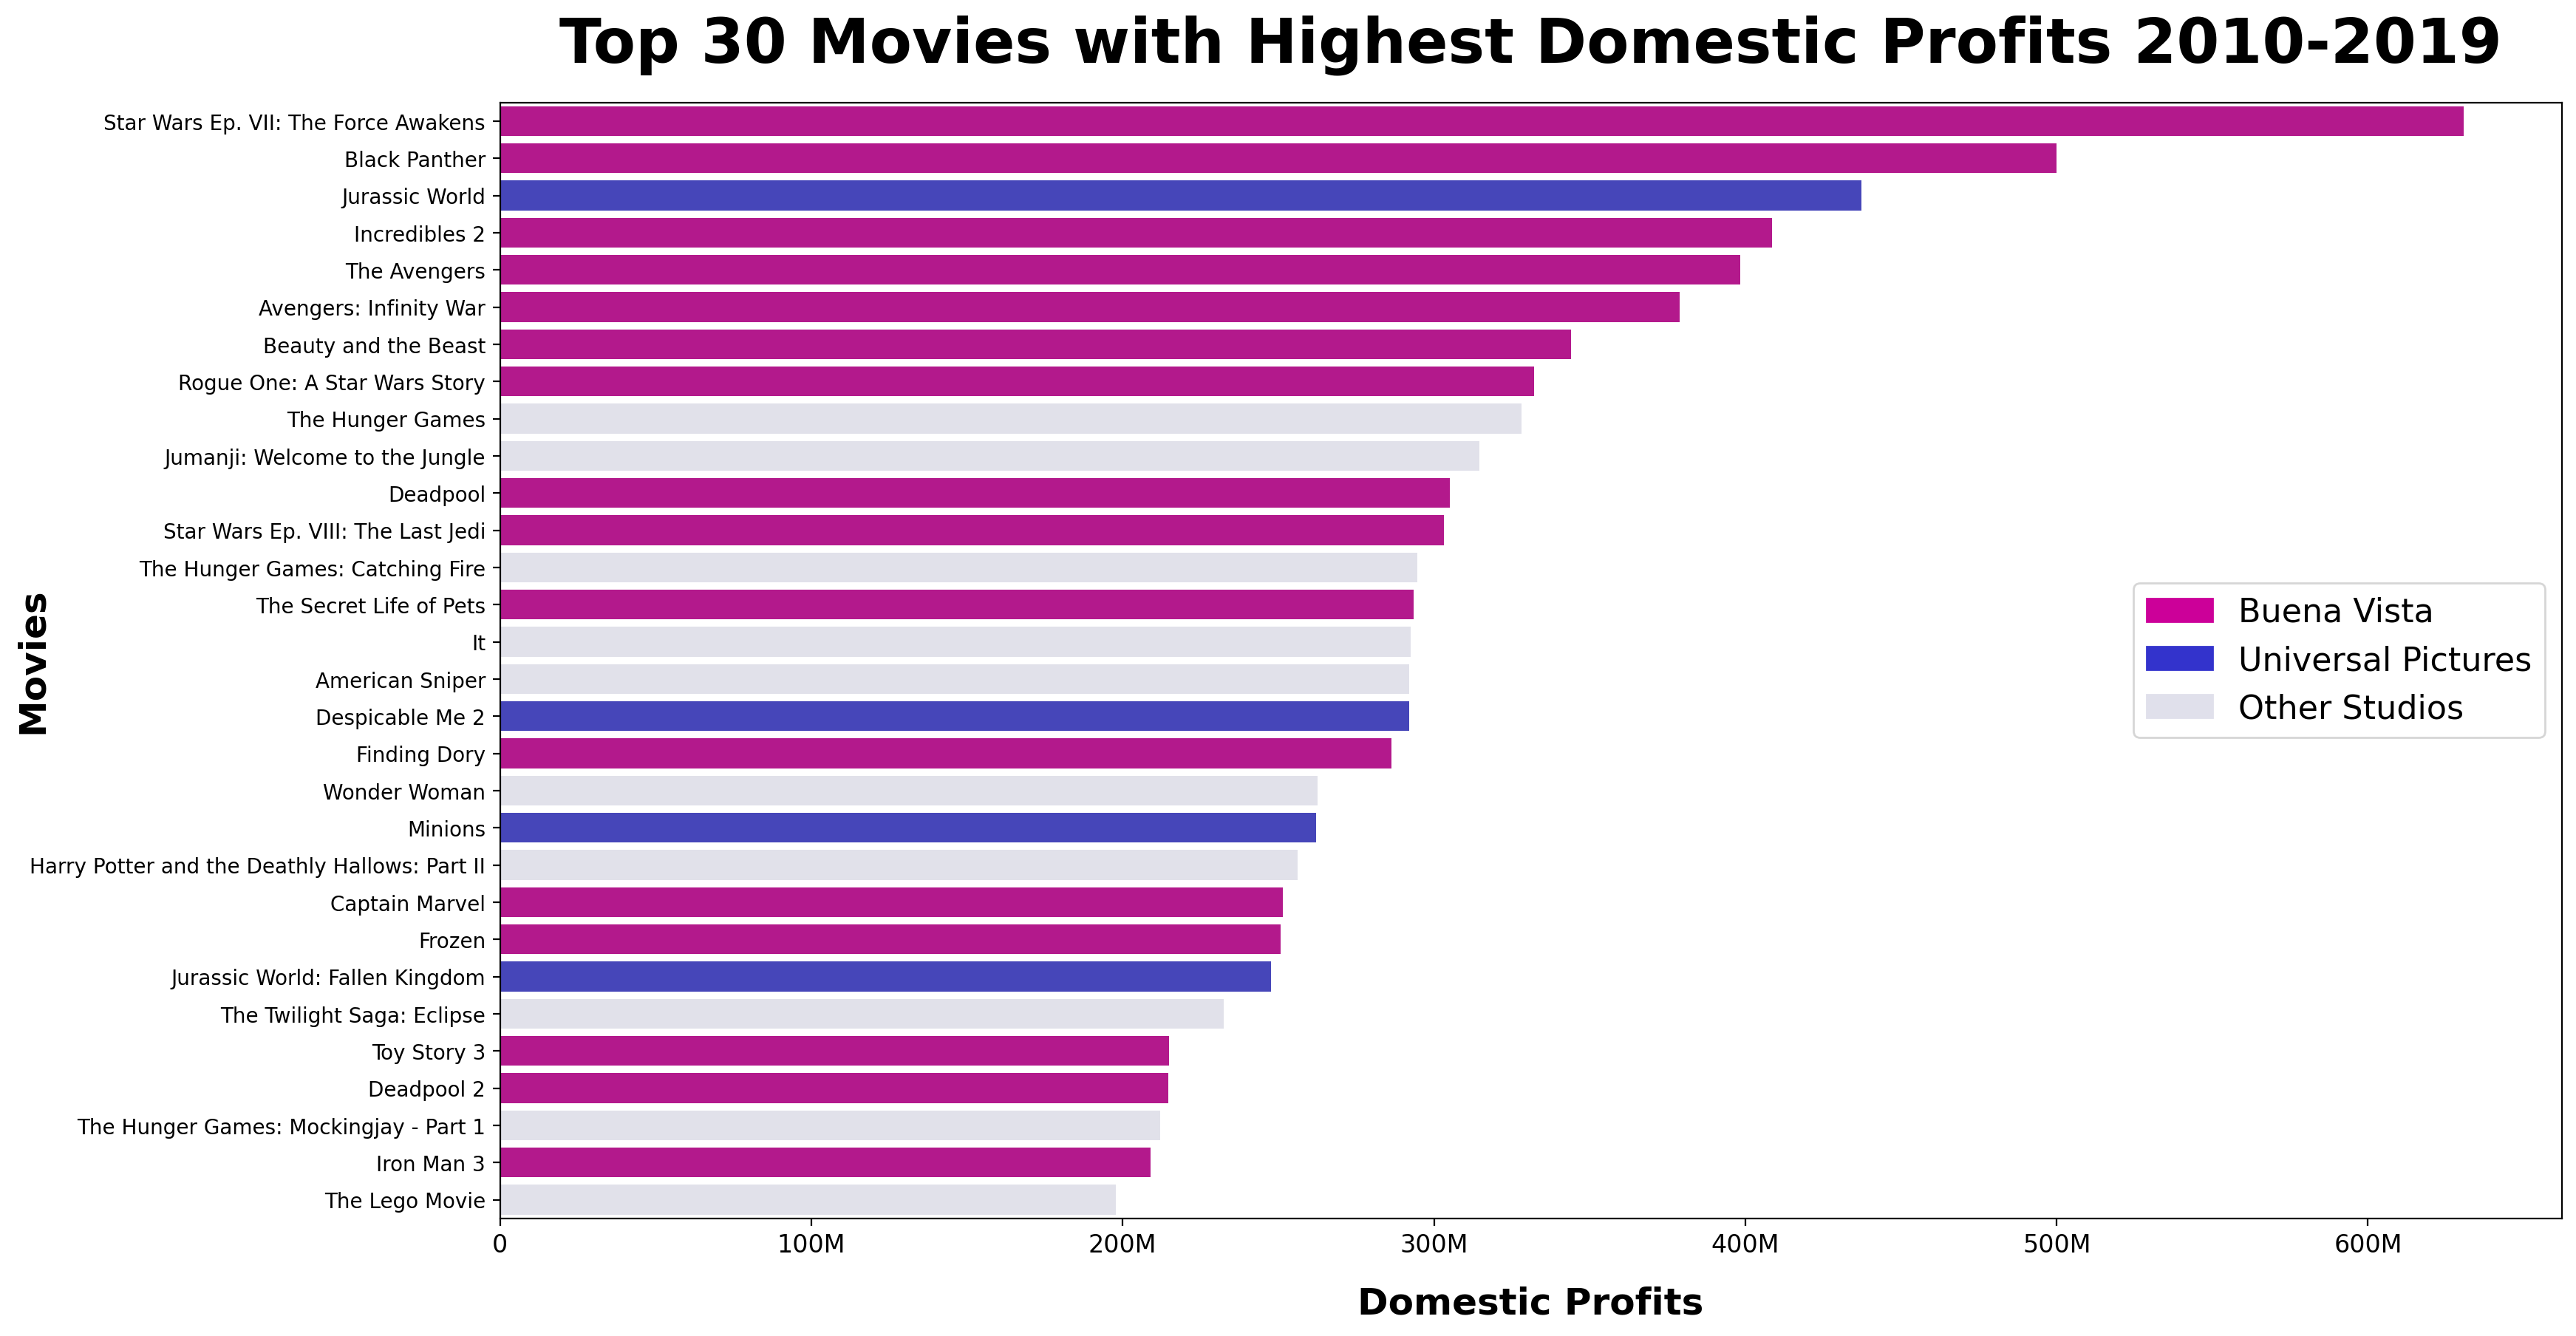

In [3]:
## Bar chart of Top 30 Movies with Highest Domestic Profits

fig, ax = plt.subplots(figsize=(18,10), dpi=200)

x1 = mb_dp['movie'][0:30]
y1 = mb_dp['domestic_profit'][0:30]


# Buena Vista is MAGENTA
# Universal Pictures is VIOLET
ax = sns.barplot(x=y1, y=x1,
                 palette=["#cc0099"
                          if x=='Star Wars Ep. VII: The Force Awakens'
                          or x=='Black Panther'
                          or x=='Incredibles 2'
                          or x=='The Avengers'
                          or x=='Avengers: Infinity War'
                          or x=='Beauty and the Beast'
                          or x=='Rogue One: A Star Wars Story'
                          or x=='Deadpool'
                          or x=='Star Wars Ep. VIII: The Last Jedi'
                          or x=='The Secret Life of Pets'
                          or x=='Finding Dory'
                          or x=='Captain Marvel'
                          or x=='Frozen'
                          or x=='Toy Story 3'
                          or x=='Deadpool 2'
                          or x=='Iron Man 3'
                          else '#3333cc'
                          if x=='Jurassic World'
                          or x=='Furious 7'
                          or x=='Jurassic World: Fallen Kingdom'
                          or x=='Minions'
                          or x=='Despicable Me 2'
                          else '#e0e0eb' for x in mb_dp['movie']])

ax.set_xlabel('Domestic Profits', fontsize=18, fontweight='bold', labelpad=14)
ax.set_ylabel('Movies', fontsize=18, fontweight='bold', labelpad=(-10))
ax.set_title('Top 30 Movies with Highest Domestic Profits 2010-2019', fontsize=30, fontweight='bold', pad=20)

plt.xticks(ticks=[0,100000000,200000000,300000000,400000000,500000000,600000000],
           labels=['0','100M', '200M', '300M', '400M', '500M', '600M'], fontsize=12)
plt.yticks(fontsize=10)

bv_label = mpatches.Patch(color='#cc0099', label='Buena Vista')
up_label = mpatches.Patch(color='#3333cc', label='Universal Pictures')
other_label = mpatches.Patch(color='#e0e0eb', label='Other Studios')
ax.legend(handles=[bv_label, up_label, other_label], loc='center right', prop={'size':16});

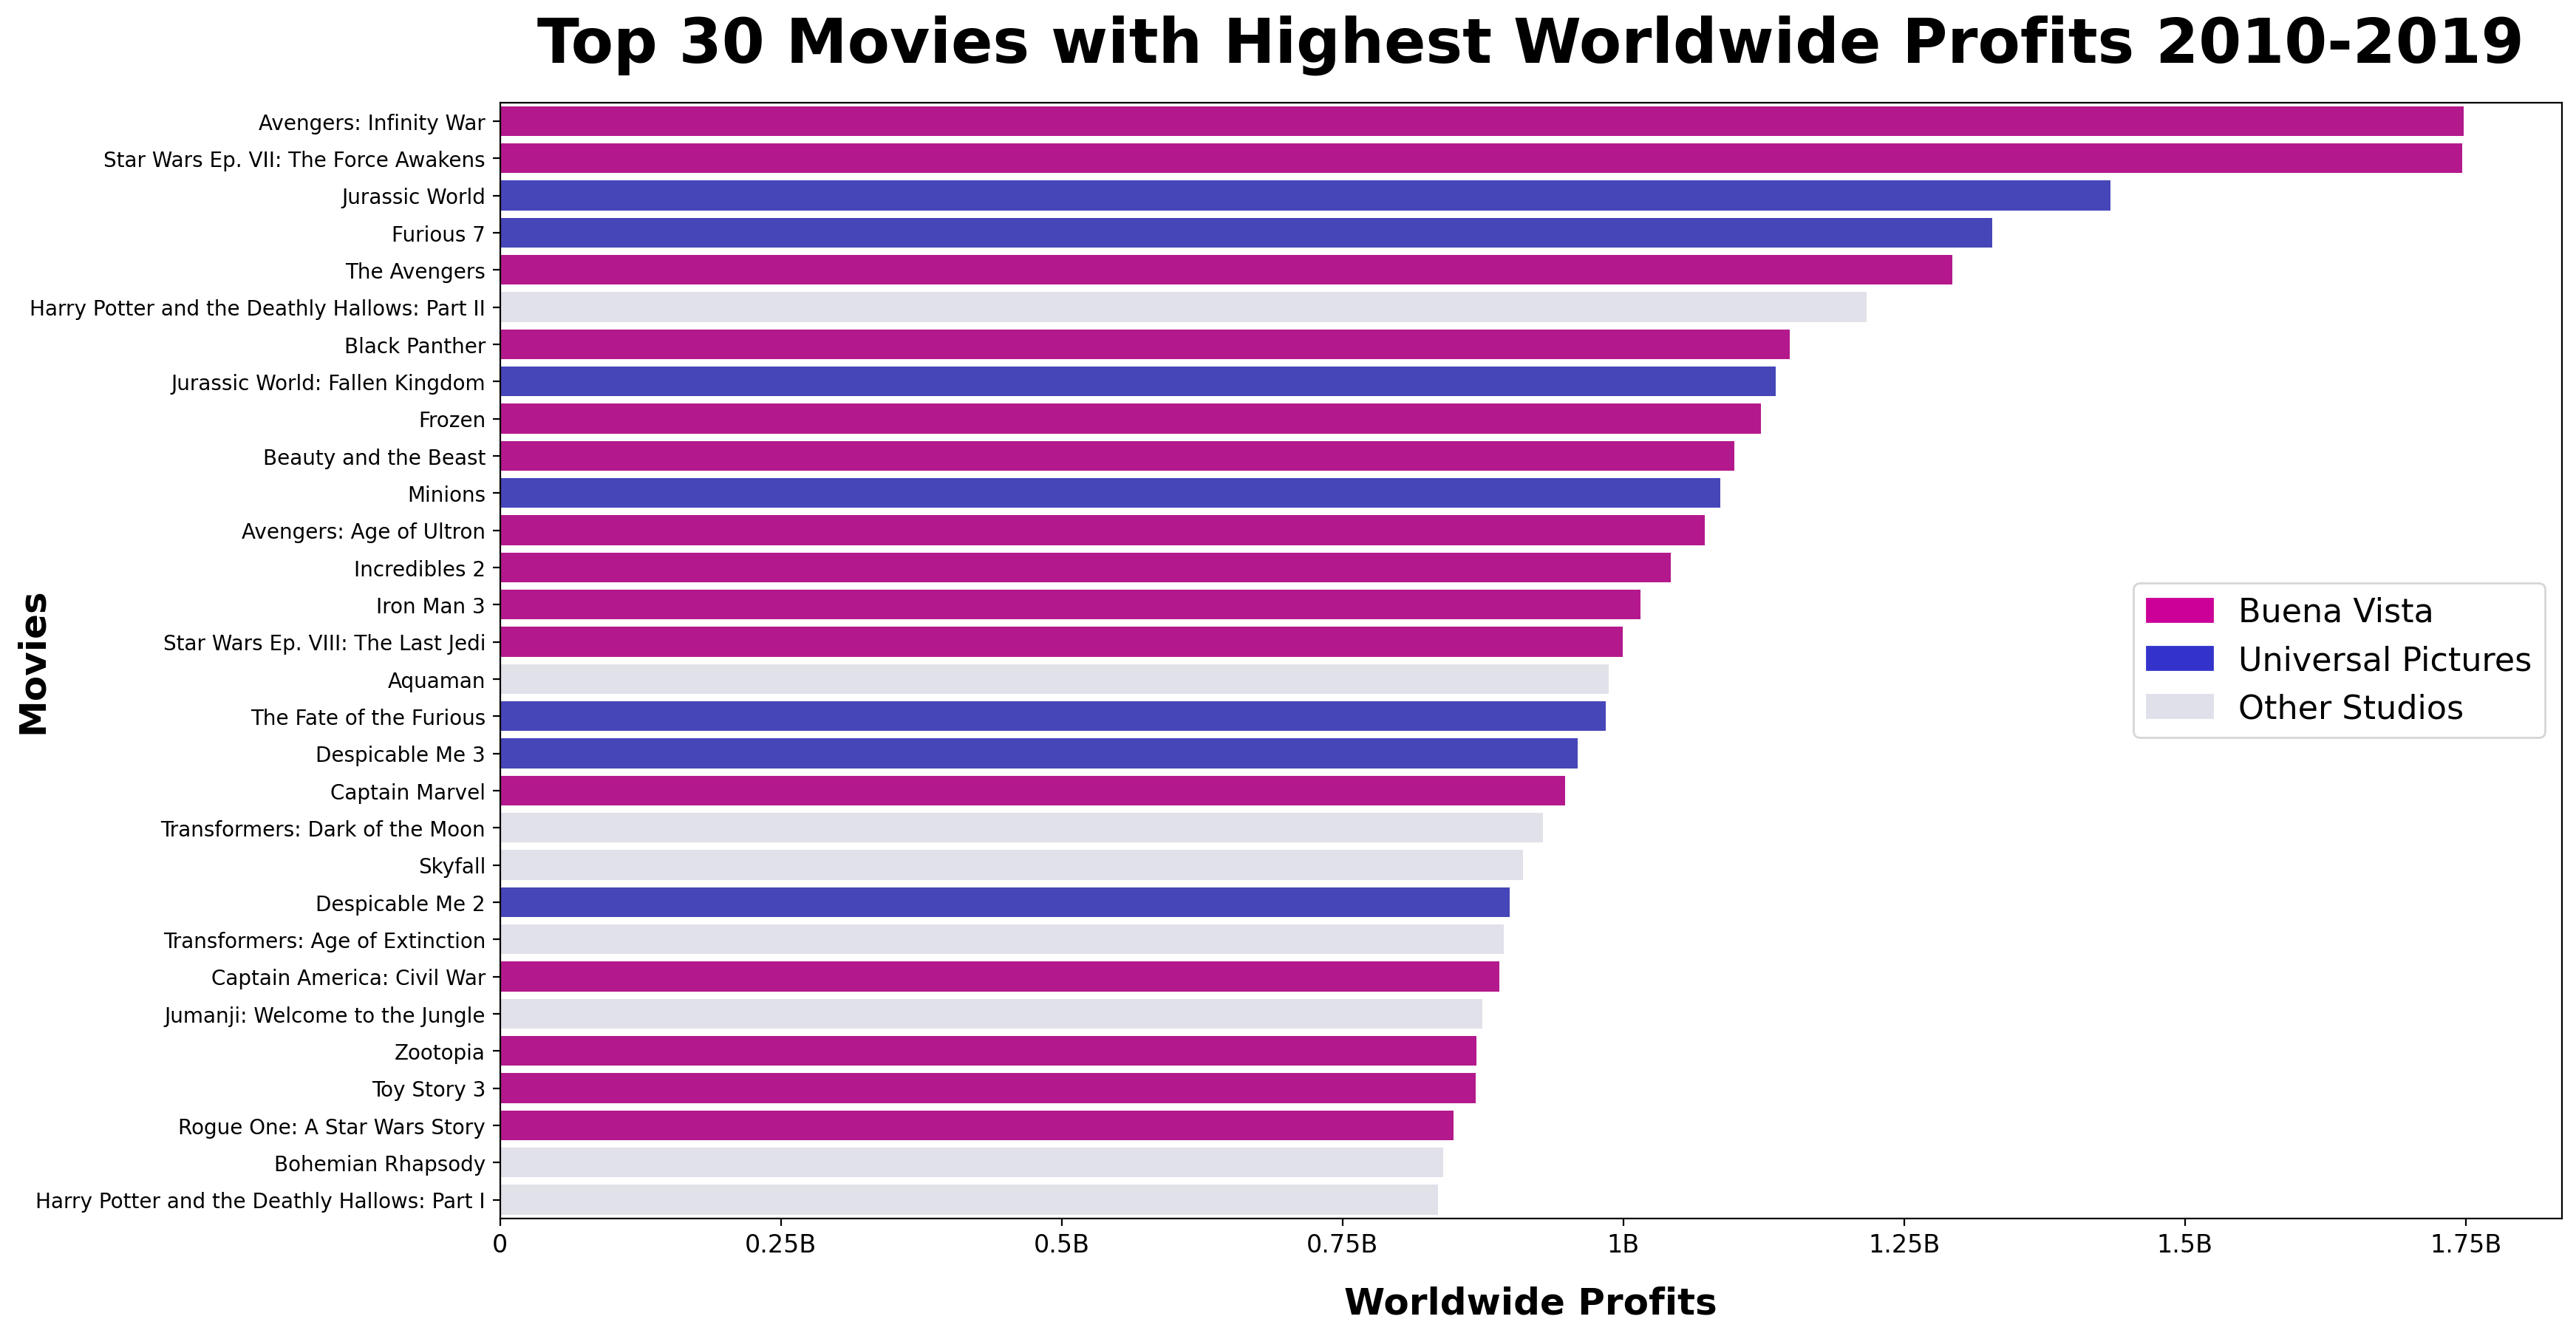

In [4]:
## Bar chart of Top 30 Movies with Highest Worldwide Profits

fig, ax = plt.subplots(figsize=(18,10), dpi=200)

x2 = mb_wp['movie'][0:30]
y2 = mb_wp['worldwide_profit'][0:30]


# Buena Vista is MAGENTA
# Universal Pictures is VIOLET
ax = sns.barplot(x=y2, y=x2,
                 palette=["#cc0099"
                          if x=='Star Wars Ep. VII: The Force Awakens'
                          or x=='Black Panther'
                          or x=='Incredibles 2'
                          or x=='The Avengers'
                          or x=='Avengers: Infinity War'
                          or x=='Beauty and the Beast'
                          or x=='Rogue One: A Star Wars Story'
                          or x=='Deadpool'
                          or x=='Star Wars Ep. VIII: The Last Jedi'
                          or x=='The Secret Life of Pets'
                          or x=='Finding Dory'
                          or x=='Captain Marvel'
                          or x=='Frozen'
                          or x=='Toy Story 3'
                          or x=='Deadpool 2'
                          or x=='Iron Man 3'
                          or x=='Frozen'
                          or x=='Beauty and the Beast'
                          or x=='Stars Wars Ep. VIII: The Last Jedi'
                          or x=='Captain Marvel'
                          or x=='Zootopia'
                          or x=='Avengers: Age of Ultron'
                          or x=='Captain America: Civil War'
                          else '#3333cc'
                          if x=='Jurassic World'
                          or x=='Furious 7'
                          or x=='Jurassic World: Fallen Kingdom'
                          or x=='Minions'
                          or x=='Despicable Me 2'
                          or x=='The Fate of the Furious'
                          or x=='Despicable Me 3'
                          else '#e0e0eb' for x in mb_wp['movie']])

ax.set_xlabel('Worldwide Profits', fontsize=18, fontweight='bold', labelpad=14)
ax.set_ylabel('Movies', fontsize=18, fontweight='bold', labelpad=(-10))
ax.set_title('Top 30 Movies with Highest Worldwide Profits 2010-2019', fontsize=30, fontweight='bold', pad=20)

plt.xticks(ticks=[0,0.25e9,0.5e9,0.75e9,1e9,1.25e9,1.5e9,1.75e9],
           labels=['0', '0.25B', '0.5B', '0.75B', '1B', '1.25B', '1.5B', '1.75B'], fontsize=12)
plt.yticks(fontsize=10)

bv_label = mpatches.Patch(color='#cc0099', label='Buena Vista')
up_label = mpatches.Patch(color='#3333cc', label='Universal Pictures')
other_label = mpatches.Patch(color='#e0e0eb', label='Other Studios')
ax.legend(handles=[bv_label, up_label, other_label], loc='center right', prop={'size':16});

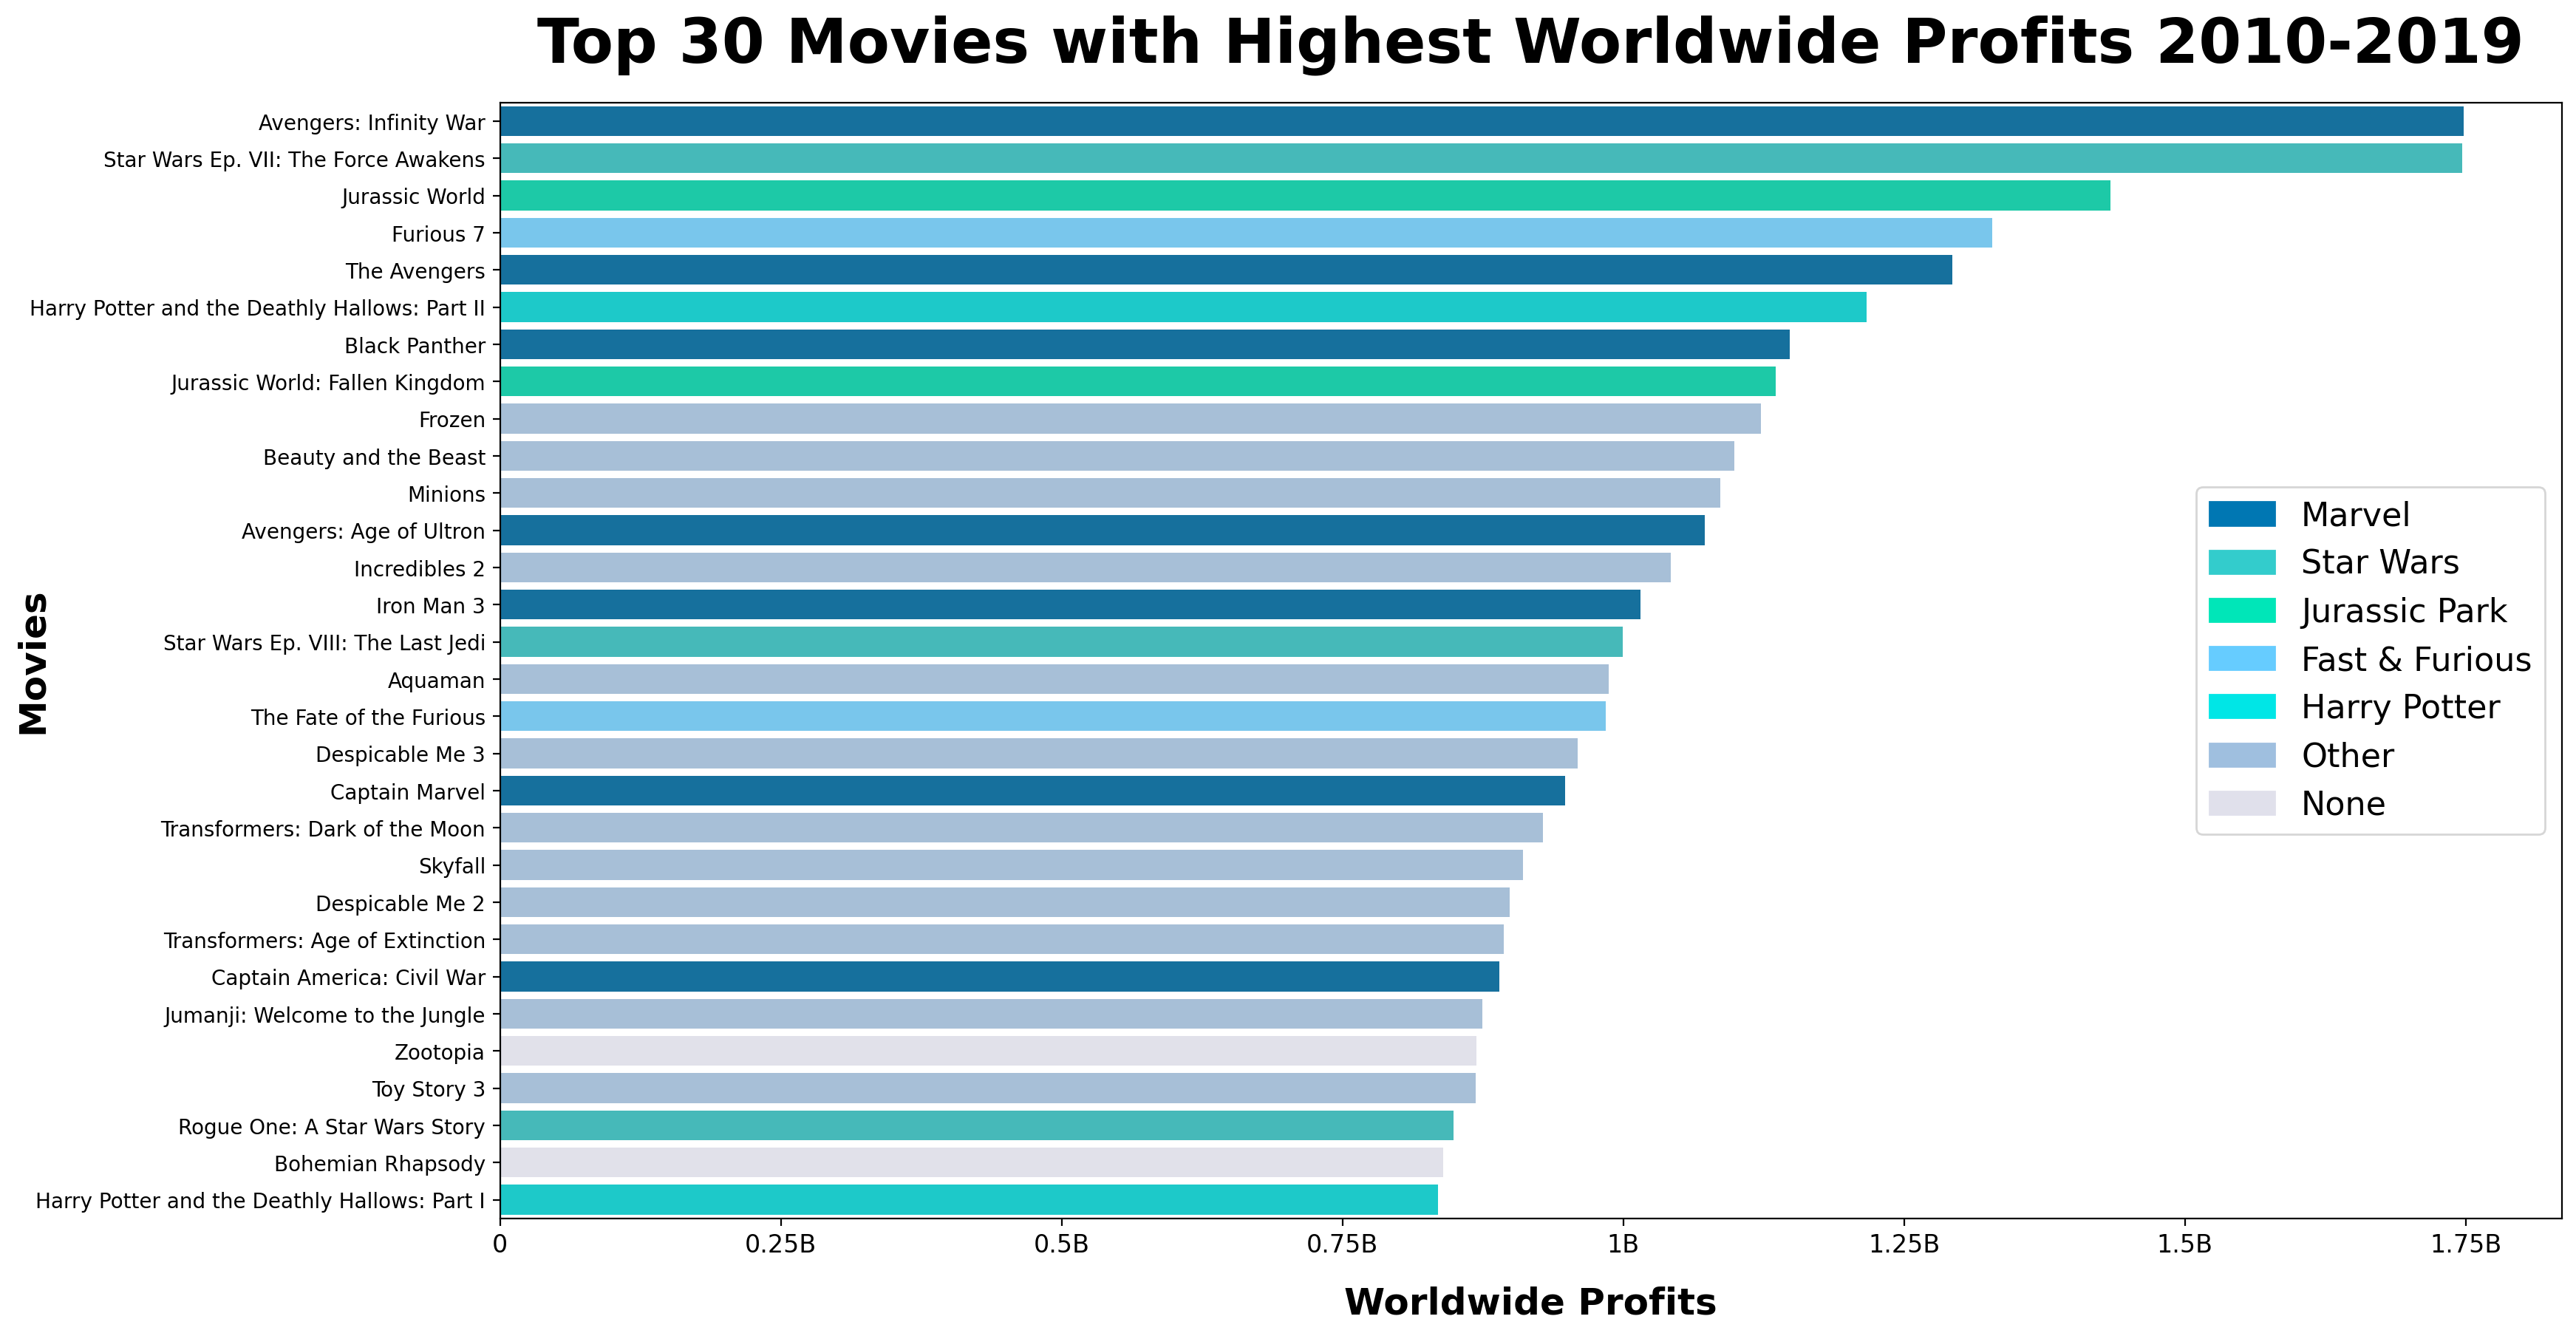

In [30]:
## Bar chart of Top 30 Movies with Highest Worldwide Profits

fig, ax = plt.subplots(figsize=(18,10), dpi=200)

x2 = mb_wp['movie'][0:30]
y2 = mb_wp['worldwide_profit'][0:30]


ax = sns.barplot(x=y2, y=x2,
                 palette=["#0077b3" # Marvel
                          if x=='Avengers: Infinity War'
                          or x=='The Avengers'
                          or x=='Black Panther'
                          or x=='Avengers: Age of Ultron'
                          or x=='Iron Man 3'
                          or x=='Captain Marvel'
                          or x=='Deadpool 2'
                          or x=='Iron Man 3'
                          or x=='Captain America: Civil War'
                          else '#33cccc' # Star Wars
                          if x=='Star Wars Ep. VII: The Force Awakens'
                          or x=='Star Wars Ep. VIII: The Last Jedi'
                          or x=='Rogue One: A Star Wars Story'
                          else '#00e6b8' # Jurassic Park
                          if x=='Jurassic World'
                          or x=='Jurassic World: Fallen Kingdom'
                          else "#66ccff" # Fast & Furious
                          if x=='Furious 7'
                          or x=='The Fate of the Furious'
                          else '#00e6e6' # Harry Potter
                          if x=='Harry Potter and the Deathly Hallows: Part II'
                          or x=='Harry Potter and the Deathly Hallows: Part I'
                          else '#9fbfdf' # Other Franchises
                          if x=='Frozen'
                          or x=='Beauty and the Beast'
                          or x=='Minions'
                          or x=='Incredibles 2'
                          or x=='Despicable Me 3'
                          or x=='Despicable Me 2'
                          or x=='Aquaman'
                          or x=='Transformers: Dark of the Moon'
                          or x=='Transformers: Age of Extinction'
                          or x=='Skyfall'
                          or x=='Jumanji: Welcome to the Jungle'
                          or x=='Toy Story 3'
                          else '#e0e0eb' for x in mb_wp['movie']])

ax.set_xlabel('Worldwide Profits', fontsize=18, fontweight='bold', labelpad=14)
ax.set_ylabel('Movies', fontsize=18, fontweight='bold', labelpad=(-10))
ax.set_title('Top 30 Movies with Highest Worldwide Profits 2010-2019', fontsize=30, fontweight='bold', pad=20)

plt.xticks(ticks=[0,0.25e9,0.5e9,0.75e9,1e9,1.25e9,1.5e9,1.75e9],
           labels=['0', '0.25B', '0.5B', '0.75B', '1B', '1.25B', '1.5B', '1.75B'], fontsize=12)
plt.yticks(fontsize=10)

marvel_label = mpatches.Patch(color='#0077b3', label='Marvel')
starwars_label = mpatches.Patch(color='#33cccc', label='Star Wars')
jurassic_label = mpatches.Patch(color='#00e6b8', label='Jurassic Park')
fastfurious_label = mpatches.Patch(color='#66ccff', label='Fast & Furious')
hp_label = mpatches.Patch(color='#00e6e6', label='Harry Potter')
otherfr_label = mpatches.Patch(color='#9fbfdf', label='Other')
nofr_label = mpatches.Patch(color='#e0e0eb', label='None')
ax.legend(handles=[marvel_label,
                   starwars_label,
                   jurassic_label,
                   fastfurious_label,
                   hp_label,
                   otherfr_label,
                   nofr_label],
          loc='center right', prop={'size':16});

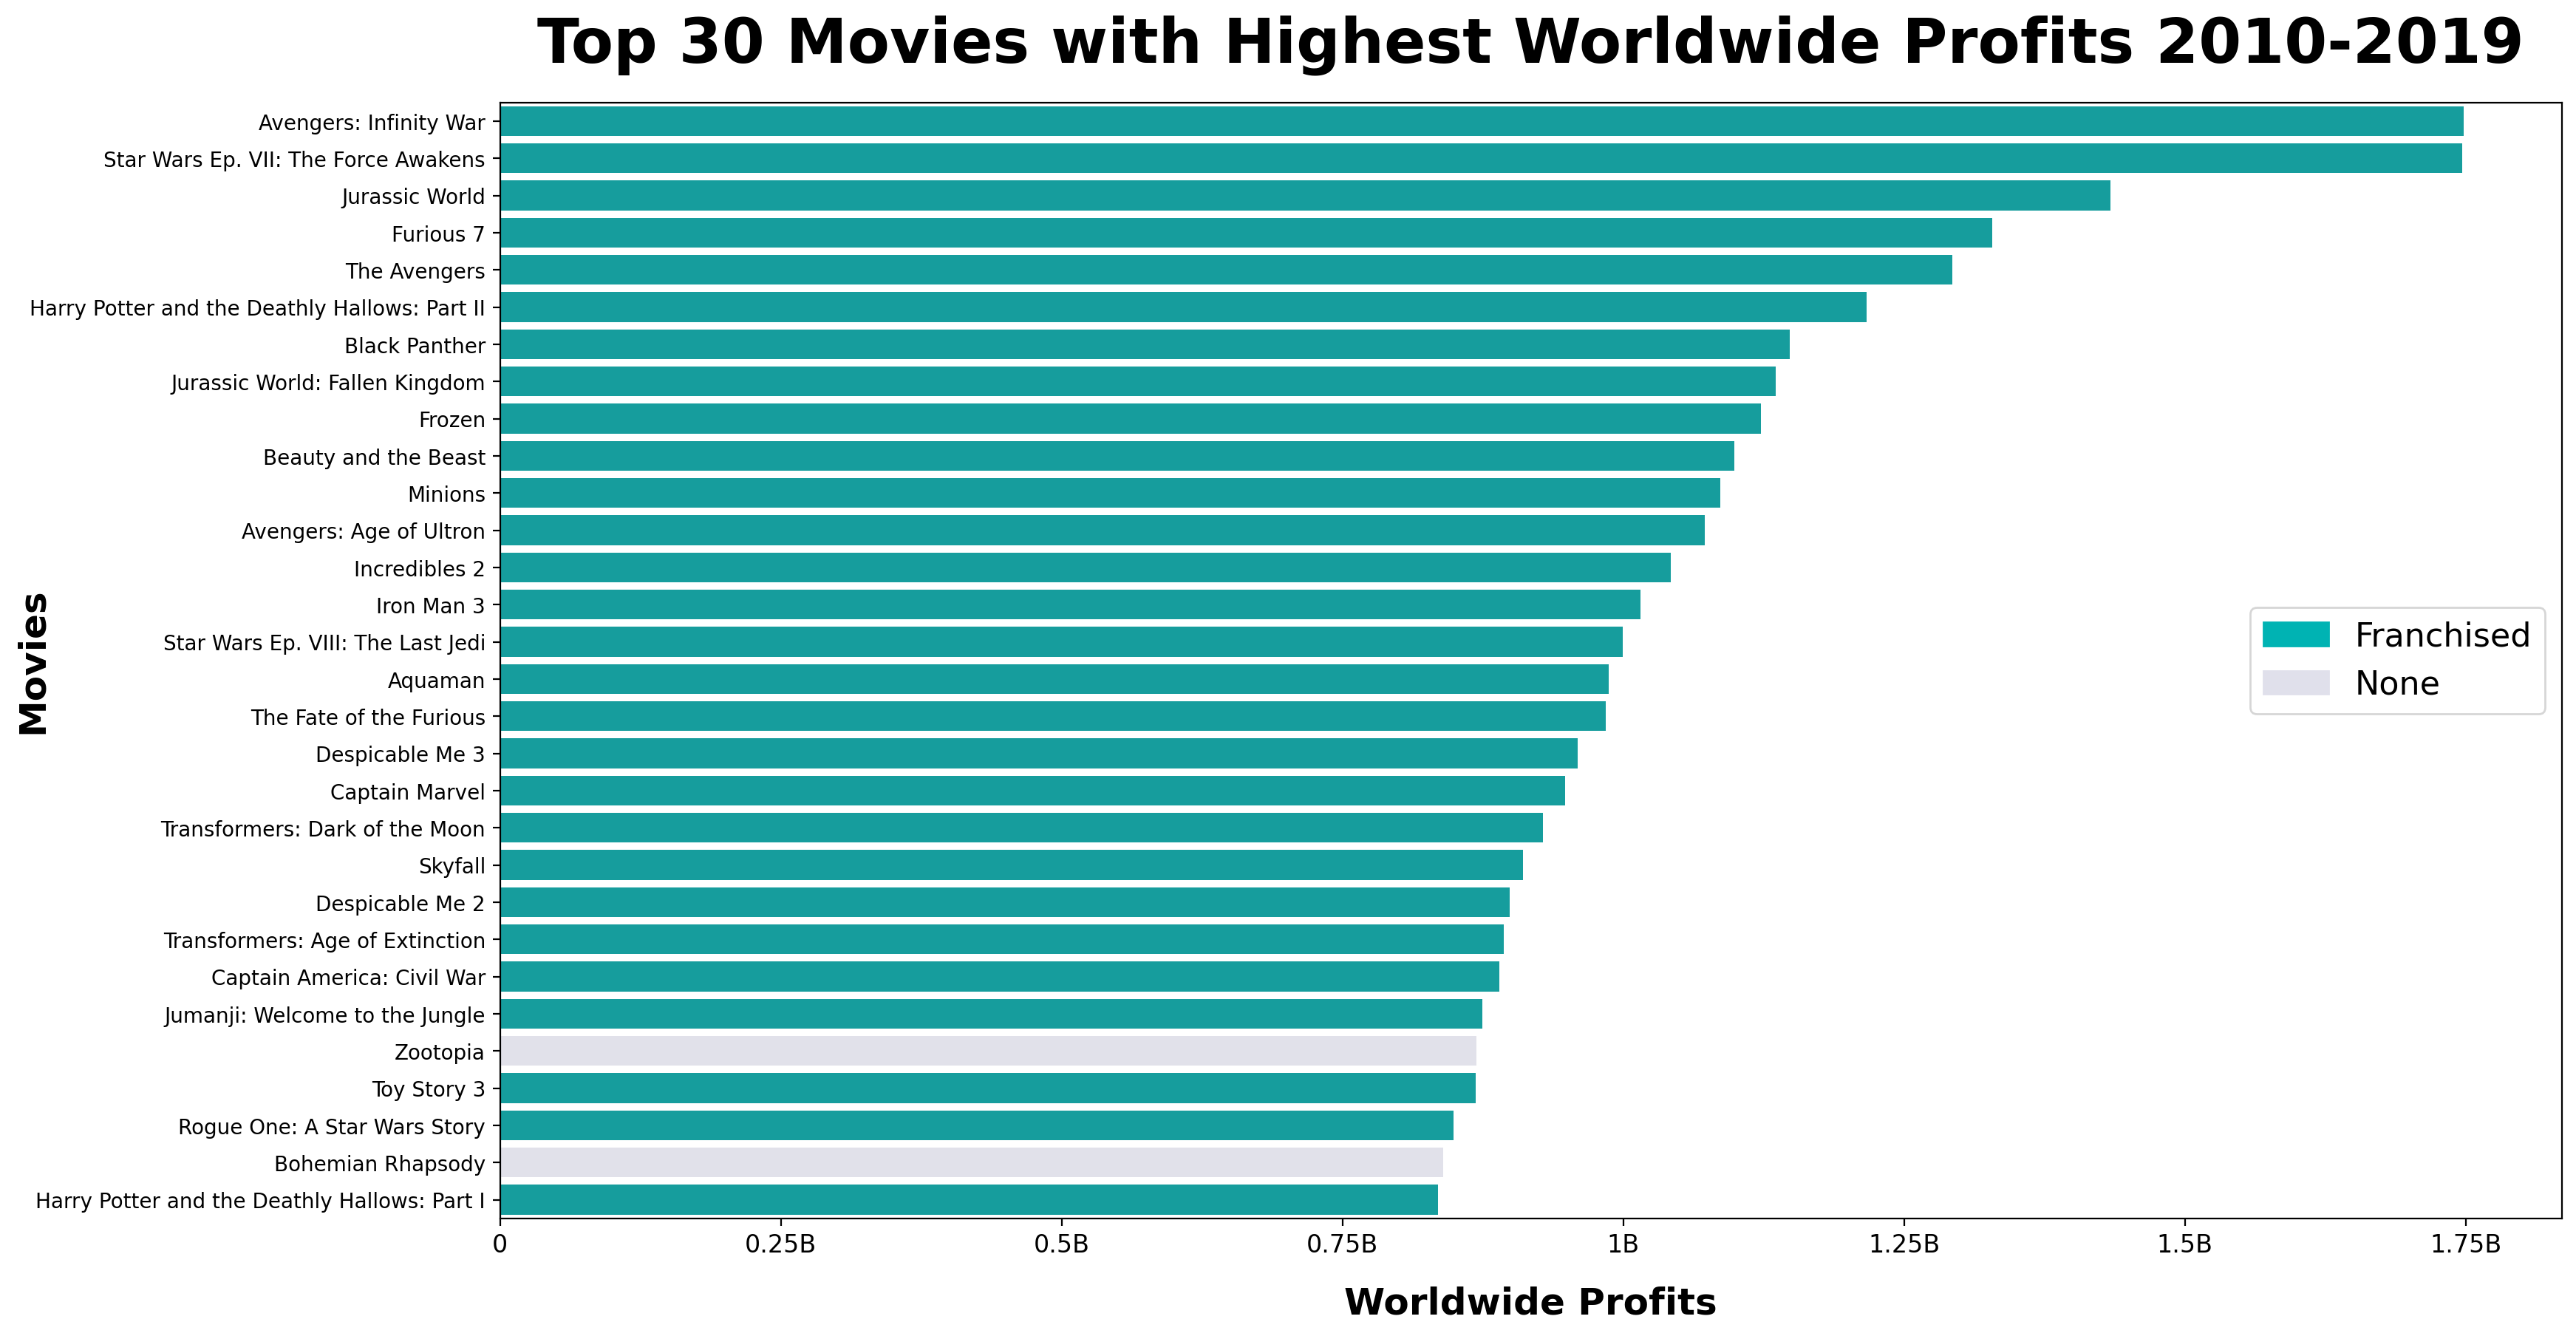

In [34]:
## Bar chart of Top 30 Movies with Highest Worldwide Profits

fig, ax = plt.subplots(figsize=(18,10), dpi=200)

x2 = mb_wp['movie'][0:30]
y2 = mb_wp['worldwide_profit'][0:30]


ax = sns.barplot(x=y2, y=x2,
                 palette=["#e0e0eb"
                          if x=='Bohemian Rhapsody'
                          or x=='Zootopia'
                          else '#00b3b3' for x in mb_wp['movie']])

ax.set_xlabel('Worldwide Profits', fontsize=18, fontweight='bold', labelpad=14)
ax.set_ylabel('Movies', fontsize=18, fontweight='bold', labelpad=(-10))
ax.set_title('Top 30 Movies with Highest Worldwide Profits 2010-2019', fontsize=30, fontweight='bold', pad=20)

plt.xticks(ticks=[0,0.25e9,0.5e9,0.75e9,1e9,1.25e9,1.5e9,1.75e9],
           labels=['0', '0.25B', '0.5B', '0.75B', '1B', '1.25B', '1.5B', '1.75B'], fontsize=12)
plt.yticks(fontsize=10)

fr_label = mpatches.Patch(color='#00b3b3', label='Franchised')
none_label = mpatches.Patch(color='#e0e0eb', label='None')
ax.legend(handles=[fr_label, none_label], loc='center right', prop={'size':16});